#### **DESENVOLVIMENTO DO CÓDIGO**

1. Importação das bibliotecas
   
O primeiro passo para a realização da criação do gráfico para análise das propriedades mecânicas é a importação das bibliotecas que serão uteis para leitura da tabela, plotagem de gráficos e manipulação de matrizes, a saber pandas, matplotlib e numpy, respectivamente, em que serão chamadas como variáveis simplificadas: *pd*, *plt*, *np*.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2. Modularização (Criação do módulo)

Também será importado um módulo que foi criado contida a função *plotMosaico* para servi como subalgoritmo, reduzindo o código principal. O módulo está condito no diretório *plotagem* e está organizado da seguinte forma:

In [36]:
from plotagem import plotagem

In [33]:
!tree

.
├── codigoAvaliacao.py
├── dadosEnsaioTracao.xlsx
├── figuras
│   ├── Figure_1.png
│   ├── Figure_2.png
│   ├── graficoVersaoRevisar.png
│   └── melhoraNoGrafico.png
├── plotagem
│   ├── __init__.py
│   ├── plotagem.py
│   └── __pycache__
│       ├── __init__.cpython-312.pyc
│       └── plotagem.cpython-312.pyc
├── __pycache__
│   └── codigoAvaliacao.cpython-312.pyc
├── README.md
└── RelatorioCodigo.ipynb

5 directories, 13 files


O conteúdo da função está exposto a baixo e consiste em plotar as diferentes regiões que estaram contidos numa lista em formato de objetos e são inseridas pelo parâmetro *regioes*. Outro parâmetro importante será o *textPlot* em que receberá um booleano que define se será adicionado uma indicação do ângulo e do modulo de elasticidade na plotagem da região. Vê-se que compete saber essas informações só na região elástica, logo será indicado como *True* quando for feito a chamada da função para ela. A plotagem será feita em formato moisaco do matplotlib, por essa razão foi adicionado o parâmetro *pos*, que defini a posição do objeto axes, o qual também é um parâmetro no qual diz o plot que eu estou me referindo. As posições dos plots na figura são definidas na criação da variável *axs* que recebe o plot e são *upleft*, *upright*, *lowleft*, *lowright*, traduzindo, superior esquerdo, superior esquerdo, inferior esquerdo e inferior direito, respectivamente. Os demais parâmetros são para as funções de ajuste e plotagem do matplotlib.

In [ ]:
def plotMosaico(fig, axs, title, labelx, labely, pos, regioes, enquadro, posText=(0,0), legendaLoc="",textPlot=bool):

Esse laço abaixo é feito para navegar em cada região da lista *regioes*, em que será plotado o gráfico com base nas propriedades de cada objeto, como posição x, posição y, cor, label. Em seguida será plotado com a função *scatter* do matplotlib o ponto final de cada gráfico, e o par ordenado será composto pela última posição da propriedade x e y do objeto, que serão adquiridas por *[-1]*.  Nesse ponto estará localizado os limites, por exemplo, a região elástica vai ter o limite de escoamento, a região plástica vai ter o limite de resistência a tração e a região da ruptura vai ter o limite que será a ruptura. Nesses limites será posto uma seta junto com a *string* que indentificadará cada um, para tanto será utilizado o parâmetro *posText* que somará com o par ordenado definindo a posição do texto e da seta.

In [ ]:
for reg in regioes:
        axs[pos].plot(reg.x, reg.y, color=reg.cor, label=reg.label)
        axs[pos].scatter(reg.x[-1], reg.y[-1], s=20, facecolor='C0', edgecolor='k')
        axs[pos].annotate(reg.limite+f' (${reg.x[-1]:.3f}, ${reg.y[-1]:.4f})', xy=(reg.x[-1], reg.y[-1]), xytext=(reg.x[-1] + posText[0], reg.y[-1] + posText[1]),
                               arrowprops=dict(facecolor='black', shrink=0.1))

Em segundo plano, tem-se a utilização do *textPlot* para definir a região e o gráfico que ficará indicado o ângulo e o texto contido o  **módulo de elasticidade**

In [ ]:
if textPlot:
        axs[pos].annotate(f'{reg.anguloGraus:.4f}°', xy=(reg.x[0], reg.y[0]), xytext=(reg.x[0]+0.0001, reg.y[0]+0.001),
                       arrowprops=dict(facecolor='red', shrink=0))
        axs[pos].text(reg.x[0]+0.001, reg.y[0]+0.01, f'$\epsilon={reg.variacao:.4f}$',fontsize=15)

Por fim, será chamado várias funções padrões do matplotlib para criar uma grade no gráfico, nomear os eixos, entitular o gráfico, definir os limites dos eixos e a localização da legenda.

In [ ]:
axs[pos].grid(False)
axs[pos].set_xlabel(labelx)
axs[pos].set_ylabel(labely)
axs[pos].set_title(title)
axs[pos].axis(enquadro)
axs[pos].legend(loc=legendaLoc)

3. Leitura dos dados do corpo de prova

Em seguida será lido o arquivo .xlsx, no qual contém a tabela. Também será convertido essa tabela para um *array do numpy* para auxiliar na manipulação. Cada coluna será lida e recibida numa nos seus respectivos vetores que compreende cada uma delas. 

In [24]:
# Recebendo os dados do corpo de prova
dados = pd.read_excel("dadosEnsaioTracao.xlsx").to_numpy()

In [26]:
print(dados)

[[ 0.    50.8  ]
 [ 7.33  50.851]
 [15.1   50.902]
 [23.1   50.952]
 [30.4   51.003]
 [34.4   51.054]
 [38.4   51.308]
 [41.3   51.816]
 [44.8   52.832]
 [46.2   53.848]
 [47.3   54.864]
 [47.5   55.88 ]
 [46.1   56.896]
 [44.8   57.658]
 [42.6   58.42 ]
 [36.4   59.182]]


In [28]:
Forca = dados[:,0] # Em Newtons (Primeira Coluna)
comprimentoFinal = dados[:,1] # Em Metro (Segunda Coluna)

![image-Avaliacao.png](https://i.postimg.cc/Pq4X6YQB/image-Avaliacao.png)

(dados retirados do livro de Callister, W.D. e Rethwisch, D.G Fundamentals of Materials Science and Engineering, 4th Ed.)

3. Dimensionar o corpo de prova e calcular a tensão e a deformação

As medidas iniciais do corpo de prova foram tiradas da questão do *Callister* e para os calculos de área, força e deformação serão utilizados a seguintes fórmulas:
\begin{align}
    Área& = \frac{\pi \cdot Do^2}{4}& \sigma& = \frac{F}{Área}& \epsilon = \frac{\Delta l}{Lo}
\end{align}


In [30]:
# Definindo as dimenções inicias do corpo de prova. OBS: tudo em milímetro
comprimentoInicial = 50.8
diametroInicial = 12.8
area = (np.pi*diametroInicial**2.0)/4

Tensao = Forca / area
e = (comprimentoFinal-comprimentoInicial)/comprimentoInicial

4. Calcular os limites de resistência a tração e de elasticidade

Primeiramente, tem-se que por definição que o limite de resistência a tração é o ponto máximo do gráfico de tensão-deformação logo para acha-ló será utilizado a função *max*

In [ ]:
# Cálculo do limite de resistência a tração
limRT = max(Tensao)

Em segundo lugar, para o limite de elasticidade se sabe que é o ponto em que os anteriores tem a mesma taxa de variação, ou seja, um afastamento inicial da linearidade da curva, logo para saber esse ponto é definido um ângulo inicial

In [46]:
#Cálculo do limite de elasticidade
tamanho = Tensao.size
anguloInicial = round(np.tan(e[1] / Tensao[1]),8)
limElast = 0

for id in range(2,tamanho):
    angulo = round(np.tan(e[id]/Tensao[id]),8)
    if angulo != anguloInicial:
        limElast = Tensao[id-1]
        break

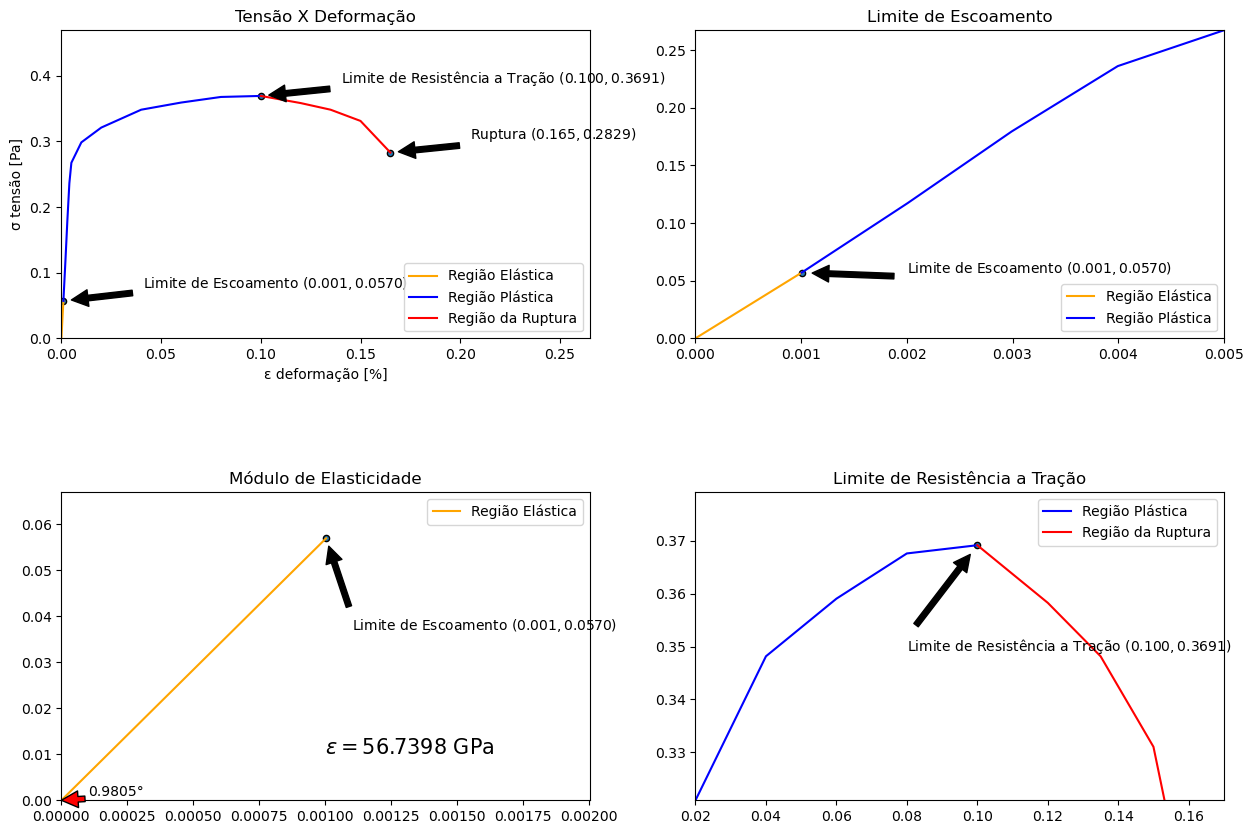

In [44]:
#Plotagem,definindo a posição dos limites e as regiões
fig, axs = plt.subplot_mosaic([['upleft', 'upright'],
                               ['lowleft', 'lowright']],  figsize=(15,10), gridspec_kw={'hspace': 0.5})
class Regiao:
    def __init__(self, inicio, fim, x, y, label, limite, cor):
        self.inicio = np.where(y == inicio)[0][0]
        self.fim = np.where(y == fim)[0][0] + 1
        self.x = x[self.inicio:self.fim]
        self.y = y[self.inicio:self.fim]
        self.limite = limite
        self.label = label
        self.cor = cor
        x0, y0 = self.x[0],self.y[0]
        x1, y1 = self.x[-1],self.y[-1]
        deltaX = x1-x0
        deltaY = y1-y0
        self.variacao = (deltaY)/(deltaX)
        self.angulo = np.arctan2(self.y,self.x)
        self.anguloGraus = (angulo*180)/np.pi

regElastica = Regiao(0, limElast, e, Tensao, "Região Elástica", "Limite de Escoamento", "orange")
regPlastica = Regiao(limElast, limRT, e, Tensao, "Região Plástica", "Limite de Resistência a Tração", "blue")
regRuptura = Regiao(limRT, Tensao[-1], e, Tensao, "Região da Ruptura", "Ruptura", "red")

limInicial_plot0 = (0,0)
limFinal_plot0 = (max(e)+0.1, max(Tensao)+0.1)

limInicial_plot1 = (0,0)
limFinal_plot1 = (regPlastica.x[4], regPlastica.y[4])

limInicial_plot2 = (regPlastica.x[6], regPlastica.y[6])
limFinal_plot2 = (regRuptura.x[1]+0.05, max(regRuptura.y)+0.01)

limInicial_plot3 = (0,0)
limFinal_plot3 = (max(regElastica.x)+0.001, max(regElastica.y)+0.01)

enquadroPlot0 = [limInicial_plot0[0], limFinal_plot0[0], limInicial_plot0[1], limFinal_plot0[1]]
enquadroPlot1 = [limInicial_plot1[0], limFinal_plot1[0], limInicial_plot1[1], limFinal_plot1[1]]
enquadroPlot2 = [limInicial_plot2[0], limFinal_plot2[0], limInicial_plot2[1], limFinal_plot2[1]]
enquadroPlot3 = [limInicial_plot3[0], limFinal_plot3[0], limInicial_plot3[1], limFinal_plot3[1]]

distanciaTextPlot0 = (0.04,0.02)
distanciaTextPlot1 = (0.001,0)
distanciaTextPlot2= (-0.02,-0.02)
distanciaTextPlot3 = (0.0001,-0.02)

lengedaLocPlot0 = "lower right"
lengedaLocPlot1 = "lower right"
lengedaLocPlot2 = "upper right"
lengedaLocPlot3 = "upper right"

plotagem.plotMosaico(fig, axs, "Tensão X Deformação",  "ε deformação [%]", "σ tensão [Pa]", "upleft", 
                     [regElastica, regPlastica, regRuptura], enquadroPlot0, distanciaTextPlot0, lengedaLocPlot0,False)
plotagem.plotMosaico(fig, axs, "Limite de Escoamento",  "", "", "upright",
                     [regElastica, regPlastica], enquadroPlot1, distanciaTextPlot1, lengedaLocPlot1, False)
plotagem.plotMosaico(fig, axs, "Limite de Resistência a Tração",  "", "", "lowright",
                     [regPlastica, regRuptura], enquadroPlot2, distanciaTextPlot2, lengedaLocPlot2, False)
plotagem.plotMosaico(fig, axs, "Módulo de Elasticidade",  "", "", "lowleft",
                     [regElastica], enquadroPlot3, distanciaTextPlot3, lengedaLocPlot3)

plt.tight_layout
plt.show()